# **Overfitting and Underfitting**

Overfitting occurs when a machine learning model learns not only the underlying patterns in the training data but also the noise or random fluctuations in that data. As a result, the model performs very well on the training data but poorly on new, unseen data (test data or validation data), as it fails to generalize beyond the training set.

In essence, an overfitted model becomes too complex, capturing irrelevant details that don't contribute to the actual patterns in the data.

What is Underfitting?
Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the data. This results in poor performance on both the training data and the test data. The model doesn’t learn enough from the training data to make accurate predictions.

In essence, an underfitted model has high bias and cannot model the complexity of the data.

### Why do Overfitting and Underfitting happen?

Overfitting happens when the model is too flexible or too complex, often due to:

- Too many features or irrelevant features in the model.

- A high degree of the polynomial function (in the case of regression).

- Too long training time, which allows the model to fit even random noise in the training data.

Underfitting happens when the model is too simplistic, often due to:

- Too few features or not enough relevant features.

- Too simple a model (e.g., using linear regression for data that has a non-linear relationship).

- Insufficient training, meaning the model hasn’t been given enough time to learn from the data.

### How to detect Overfitting and Underfitting?

Overfitting:

- Low error on the training data.

- High error on the test data or new data.

- The model seems to memorize the training data rather than generalize patterns.

Underfitting:

- High error on both the training data and the test data.

- The model cannot capture the relationship between the input features and target variable effectively.


### How to prevent Overfitting and Underfitting?

For Overfitting:

- **Simplify the model**: Use fewer features or reduce the complexity of the model.

- **Regularization**: Apply techniques like L1 (Lasso), L2 (Ridge), or Elastic Net regularization, which penalize overly complex models.

- **Cross-validation**: Use techniques like k-fold cross-validation to assess the model on different subsets of data.

- **Prune decision trees**: For tree-based models, pruning helps limit the depth and complexity of the model.

- **Early stopping**: In algorithms like gradient boosting, stop the training process when performance on the validation set begins to deteriorate.

- **Increase the size of the dataset**: More training data helps the model generalize better.

For Underfitting:

- **Increase model complexity**: Use more powerful models, add more features, or use higher-degree polynomial functions in regression.

- **Remove constraints**: For models like decision trees, allow the tree to grow deeper.

- **Reduce regularization**: Lessen the penalization of model complexity to allow the model to capture more details in the data.

- **Train for more epochs**: Let the model train longer (for models like neural networks) to capture more patterns.


### Examples in Classification and Regression

Classification Example: Decision Trees
Let's start by illustrating overfitting and underfitting in classification using a Decision Tree.

**1. Underfitting in Classification**: If you limit the depth of the decision tree (e.g., a maximum depth of 1 or 2), the tree may not be complex enough to capture the relationships in the data. As a result, it underfits the data, meaning the model cannot make accurate predictions for both the training and test sets.

**2. Overfitting in Classification**: If you allow the decision tree to grow too deep without any constraints (e.g., depth = 20), it may fit the training data perfectly. However, the model will likely memorize the data, fitting noise and making poor predictions on new data (overfitting).

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Underfitting: Shallow tree (max_depth=1)
clf_underfit = DecisionTreeClassifier(max_depth=1)
clf_underfit.fit(X_train, y_train)
y_pred_train_underfit = clf_underfit.predict(X_train)
y_pred_test_underfit = clf_underfit.predict(X_test)

# Overfitting: Deep tree (max_depth=20)
clf_overfit = DecisionTreeClassifier(max_depth=20)
clf_overfit.fit(X_train, y_train)
y_pred_train_overfit = clf_overfit.predict(X_train)
y_pred_test_overfit = clf_overfit.predict(X_test)

# Calculate accuracy
train_acc_underfit = accuracy_score(y_train, y_pred_train_underfit)
test_acc_underfit = accuracy_score(y_test, y_pred_test_underfit)

train_acc_overfit = accuracy_score(y_train, y_pred_train_overfit)
test_acc_overfit = accuracy_score(y_test, y_pred_test_overfit)

print(f"Underfitting - Train Accuracy: {train_acc_underfit}, Test Accuracy: {test_acc_underfit}")
print(f"Overfitting - Train Accuracy: {train_acc_overfit}, Test Accuracy: {test_acc_overfit}")


Underfitting - Train Accuracy: 0.675, Test Accuracy: 0.6333333333333333
Overfitting - Train Accuracy: 1.0, Test Accuracy: 1.0


### Regression Example: Polynomial Regression

**1. Underfitting in Regression**: Using a linear regression model for data that has a non-linear relationship (e.g., quadratic data) will cause underfitting. The model will be too simple to capture the patterns in the data.

**2.Overfitting in Regression**: If you use a high-degree polynomial regression (e.g., 9th or 10th degree) on data that has a simple relationship, the model will capture noise in the training data and won’t generalize well to new data.

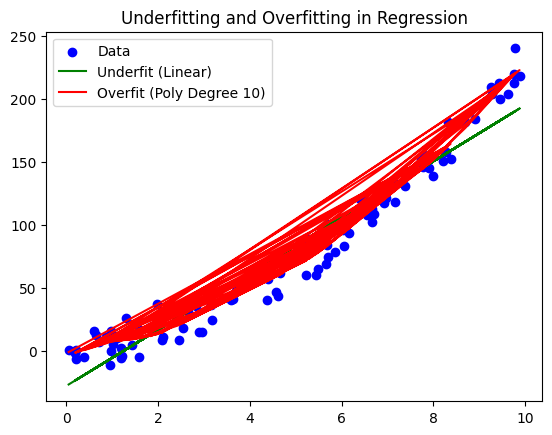

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error

# Create a dataset (quadratic data)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Random points from 0 to 10
y = 2 * (X ** 2) + 3 * X + np.random.randn(100, 1) * 10  # Quadratic relation with some noise

# Underfitting: Linear model (degree = 1)
poly_features_underfit = PolynomialFeatures(degree=1)
X_poly_underfit = poly_features_underfit.fit_transform(X)
lin_reg_underfit = LinearRegression()
lin_reg_underfit.fit(X_poly_underfit, y)
y_pred_underfit = lin_reg_underfit.predict(X_poly_underfit)

# Overfitting: High-degree polynomial model (degree = 10)
poly_features_overfit = PolynomialFeatures(degree=10)
X_poly_overfit = poly_features_overfit.fit_transform(X)
lin_reg_overfit = LinearRegression()
lin_reg_overfit.fit(X_poly_overfit, y)
y_pred_overfit = lin_reg_overfit.predict(X_poly_overfit)

# Plot results
plt.scatter(X, y, color='blue', label="Data")
plt.plot(X, y_pred_underfit, color='green', label="Underfit (Linear)")
plt.plot(X, y_pred_overfit, color='red', label="Overfit (Poly Degree 10)")
plt.title("Underfitting and Overfitting in Regression")
plt.legend()
plt.show()
